첫 번째 시간
- 실습

ㄴ### 목표
- 0~9 까지의 손글씨 이미지 데이터를 분류하는 신경망 모델을 만들어보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# keras 에서 지원하는 딥러닝 학습용 손글씨 이미지 데이터 임포트
# mnist(Modified National Institute of Standards and Technology), NIST : 미국표준기술연구소
from tensorflow.keras.datasets import mnist

In [ ]:
data = mnist.load_data()

In [ ]:
len(data)

2

In [ ]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# 이미지라는 2차원 데이터를 다루기 때문에 shape의 형태는 3칸이 나오게됨
# (데이터의 수, 세로픽셀수, 가로픽셀수)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

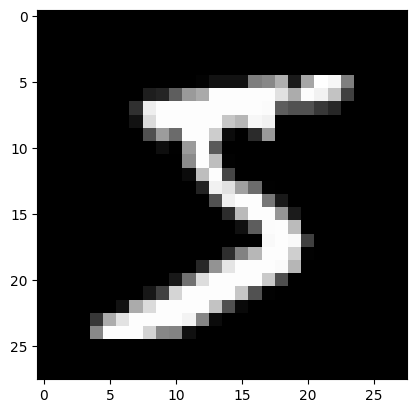

In [ ]:
# imshow : 이미지 데이터를 그림으로 출력해주는 함수
# cmap = 'gray' 이미지를 흑백으로 전환시켜주는 인자
plt.imshow(X_train[0], cmap = 'gray' );

In [ ]:
print(X_train[59999])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 25

### 정답 데이터 원핫인코딩
- pd.get_dummies : 판다스 지원 원핫인코딩
- to_categorical : keras 에서 지원 원핫인코딩

In [ ]:
pd.get_dummies(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

- 인공신경망에는 2차원인 이미지데이터를 한 번에 넣을 수 없기 때문에 데이터의차원을 전부 1차원으로 변경시켜준뒤 학습시켜야 함!

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# -1은 600000을 제외한 나머지값들을 다 곱해서 하나의 차원으로 만들어줌
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [ ]:
X_train.shape, X_test.shape
# 이미지는 픽셀 하나하나가 데이터의 특성으로 인식됨

((60000, 784), (10000, 784))

### 신경망 모델링
- 직접 모델링해봅시다~!


In [ ]:
# 입력되는 특성 수
# 출력층 활성화함수, 뉴런수
# loss 함수
# 최적화 함수 (Adam, SGD 둘다 사용해보기)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)
model.add(Dense(50, input_dim=784, activation = 'sigmoid'))

# 중간층
model.add(Dense(100, activation='sigmoid'))    #하나의 층
model.add(Dense(50, activation='sigmoid'))   #하나의 층

# 출력층
# 출력층은 문제의 종류에 따라 고정됨 (2진분류 문제는 출력층 뉴런개수 1개, 활성화함수는 sigmoid로 고정)
model.add(Dense(50,activation='sigmoid'))   # 세개이상일 땐 다중분류 해야함
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 50)                39250     
                                                                 
 dense_36 (Dense)            (None, 100)               5100      
                                                                 
 dense_37 (Dense)            (None, 50)                5050      
                                                                 
 dense_38 (Dense)            (None, 50)                2550      
                                                                 
 dense_39 (Dense)            (None, 10)                510       
                                                                 
Total params: 52,460
Trainable params: 52,460
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train.shape

(60000,)

In [ ]:
# 2. 학습 및 평가방법 설정
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam', # 최적화함수: 확률적경사하강법(SGD) 활용
              metrics = ['acc']   #metrics: 평가 방법을 설정(분류 믄제이므로 정확도 출력 필요)
              )
h = model.fit(X_train, y_train_one_hot,
              epochs = 30,
              batch_size = 128, #한번에 학습되는 데이터개수(디폴트 32개)
              verbose = 1      #학습 결과의 출력 형태 결정(0: 출력X, 1: bar형태(디폴트),2: bar없이 출력)
              )

Epoch 1/30
469/469 [==============================] - 4s 5ms/step - loss: 0.1934 - acc: 0.9407
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1869 - acc: 0.9427
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1821 - acc: 0.9429
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1806 - acc: 0.9445
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.1761 - acc: 0.9446
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1734 - acc: 0.9458
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1706 - acc: 0.9470
Epoch 8/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1665 - acc: 0.9485
Epoch 9/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1655 - acc: 0.9493
Epoch 10/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1689 - acc: 0.9476
Epoch 11/30
469/469 [============================

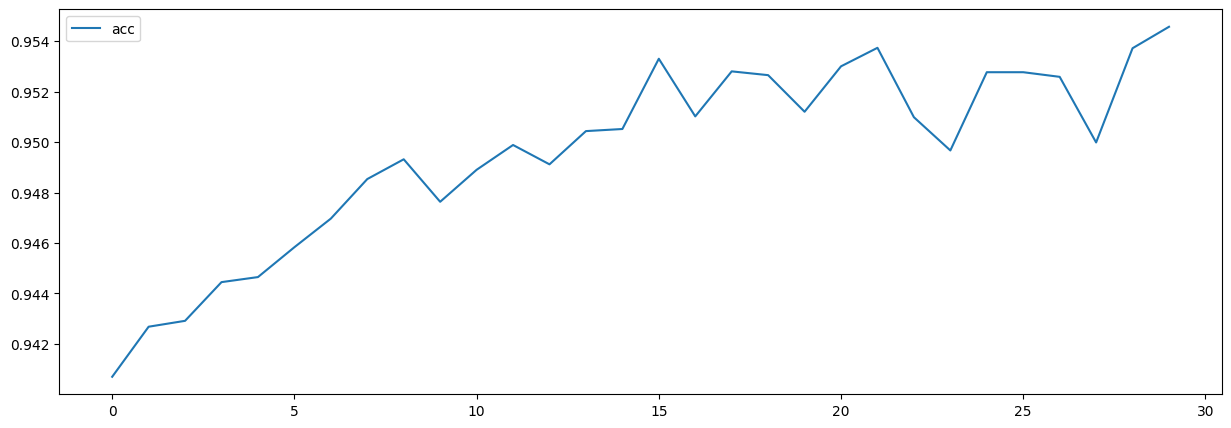

In [ ]:
# 3. 시각화
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label = 'acc')

plt.legend()
plt.show()

### 과대적합을 확인하기 위해 train 데이터에서 validation 데이터를 분리해서 학습시 같이 출력해보자!

In [ ]:
# 무조건 train, test만 나눠주는게 아니라 데이터를 일정 비율로 랜덤하게 나눠주는 기능을 갖고 있음
from sklearn.model1_selection import train_test_split

In [ ]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, y_train_one_hot,random_state=33)

In [ ]:

print(X_train.shape)
print(X_val.shape)
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)

(45000, 784)
(15000, 784)
(45000, 10)
(15000, 10)


In [ ]:

# 1. 신경망 구조 설계
model1 = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)
model1.add(Dense(50, input_dim=784, activation = 'sigmoid'))

# 중간층
model1.add(Dense(100, activation='sigmoid'))    #하나의 층
model1.add(Dense(50, activation='sigmoid'))   #하나의 층

# 출력층
# 출력층은 문제의 종류에 따라 고정됨 (2진분류 문제는 출력층 뉴런개수 1개, 활성화함수는 sigmoid로 고정)
model1.add(Dense(50,activation='sigmoid'))   # 세개이상일 땐 다중분류 해야함
model1.add(Dense(10,activation='softmax'))
model1.summary()

# 2. 학습 및 평가방법 설정
model1.compile(loss='categorical_crossentropy',
              optimizer = 'Adam', # 최적화함수: 확률적경사하강법(SGD) 활용
              metrics = ['acc']   #metrics: 평가 방법을 설정(분류 믄제이므로 정확도 출력 필요)
              )
h = model1.fit(X_train, y_train_one_hot,
              epochs = 30,
              batch_size = 128, #한번에 학습되는 데이터개수(디폴트 32개)
              verbose = 1      #학습 결과의 출력 형태 결정(0: 출력X, 1: bar형태(디폴트),2: bar없이 출력)
              )

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 50)                39250     
                                                                 
 dense_41 (Dense)            (None, 100)               5100      
                                                                 
 dense_42 (Dense)            (None, 50)                5050      
                                                                 
 dense_43 (Dense)            (None, 50)                2550      
                                                                 
 dense_44 (Dense)            (None, 10)                510       
                                                                 
Total params: 52,460
Trainable params: 52,460
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
352/352 [==============================

In [ ]:
h1 = model1.fit(X_train, y_train_one_hot,
                batch_size = 128,
                epochs = 30,
                validation_data=(X_val, y_val_one_hot)  # 검증용 데이터셋 추가
)

Epoch 1/30
352/352 [==============================] - 2s 5ms/step - loss: 0.2265 - acc: 0.9307 - val_loss: 0.2604 - val_acc: 0.9201
Epoch 2/30
352/352 [==============================] - 2s 4ms/step - loss: 0.2197 - acc: 0.9323 - val_loss: 0.2381 - val_acc: 0.9279
Epoch 3/30
352/352 [==============================] - 2s 6ms/step - loss: 0.2226 - acc: 0.9310 - val_loss: 0.2470 - val_acc: 0.9258
Epoch 4/30
352/352 [==============================] - 2s 5ms/step - loss: 0.2229 - acc: 0.9319 - val_loss: 0.2355 - val_acc: 0.9295
Epoch 5/30
352/352 [==============================] - 2s 4ms/step - loss: 0.2107 - acc: 0.9345 - val_loss: 0.2480 - val_acc: 0.9235
Epoch 6/30
352/352 [==============================] - 2s 5ms/step - loss: 0.2089 - acc: 0.9352 - val_loss: 0.2306 - val_acc: 0.9309
Epoch 7/30
352/352 [==============================] - 2s 4ms/step - loss: 0.2061 - acc: 0.9366 - val_loss: 0.2420 - val_acc: 0.9245
Epoch 8/30
352/352 [==============================] - 2s 5ms/step - loss: 0.

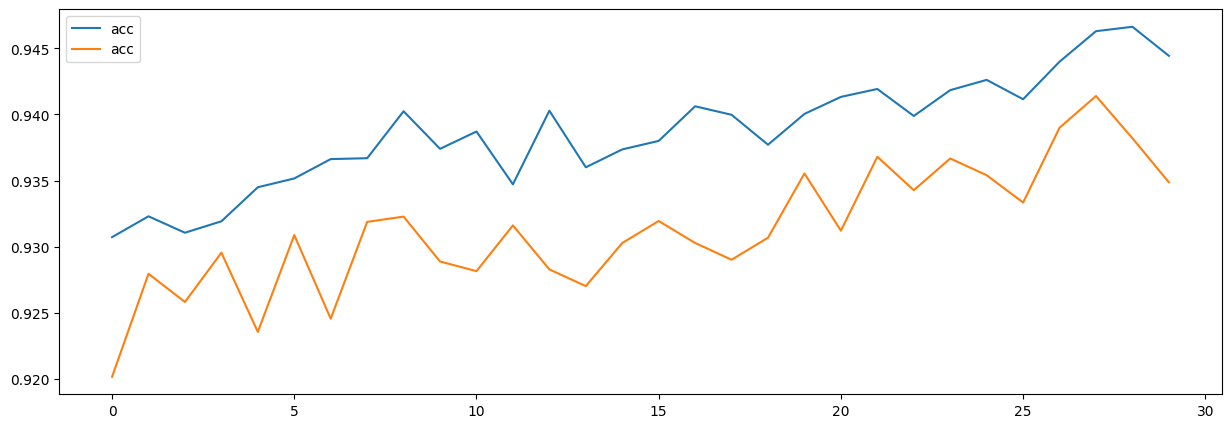

In [ ]:
# 3. 시각화
plt.figure(figsize=(15, 5))

plt.plot(h1.history['acc'], label = 'acc')
plt.plot(h1.history['val_acc'], label = 'acc')
plt.legend()
plt.show()

In [ ]:
model1.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.2040 - acc: 0.9405


[0.2039976269006729, 0.940500020980835]